# Battle of the Cities: Data Visualization
### Goals:

* ~~__bar chart of rent prices by neighborhood for each city__~~
* ~~__find median rent for 2018 and 2018 per neighborhood per city__~~ only concerned with current prices.
* ~~is rent price above national average? (folium)~~
    * looking at two of the most expensive cities in the country, this may not give much insight
    * overall average? normalize data to see how it deviates from the mean
* is rent prive above city average? (folium)(City_Rank)
    * ex: "This neighorhood is affordable relative to other Manhattan neighborhoods.

* label neighborhoods: Affordable, Average, Expensive within city and within whole dataset
    * ex: General Rank = Expensive, City Rank = Affordable
    * "This neighborhood is expensive relative to both San Francisco and Manhattan but affordable for Manhattan.
* box plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import json
import folium
from folium import plugins
import geopandas as gpd

In [7]:
#bring in data
nyc_data = gpd.read_file('nyc-merged.geojson')
nyc_data.drop(['id'], axis=1, inplace=True)

sf_data = gpd.read_file('sf-merged.geojson')
sf_data.drop(['id'], axis=1, inplace=True)

DriverError: 'sf-merged.geojson' not recognized as a supported file format.

## Rent by Neighborhood Visualizations

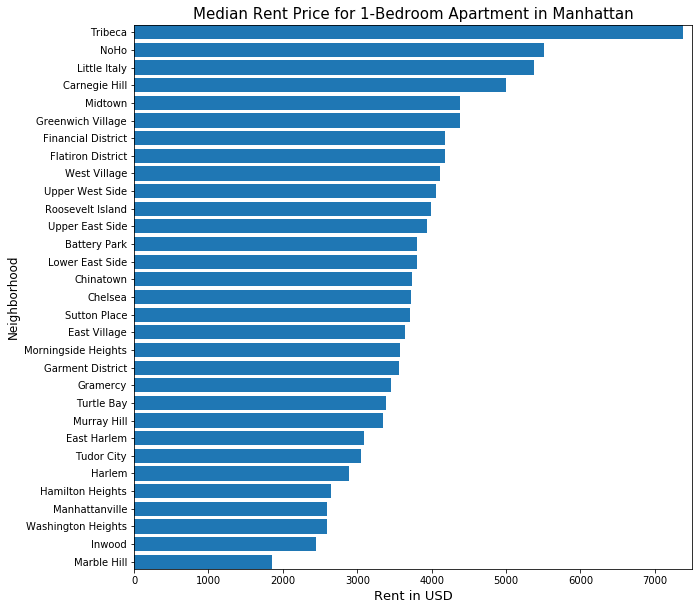

In [19]:
nyc_sort = nyc_data.copy()
nyc_sort.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 10))

plt.barh(nyc_sort.Name, nyc_sort.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in Manhattan", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,7500)
plt.ylabel("Neighborhood", size=12)

plt.show()

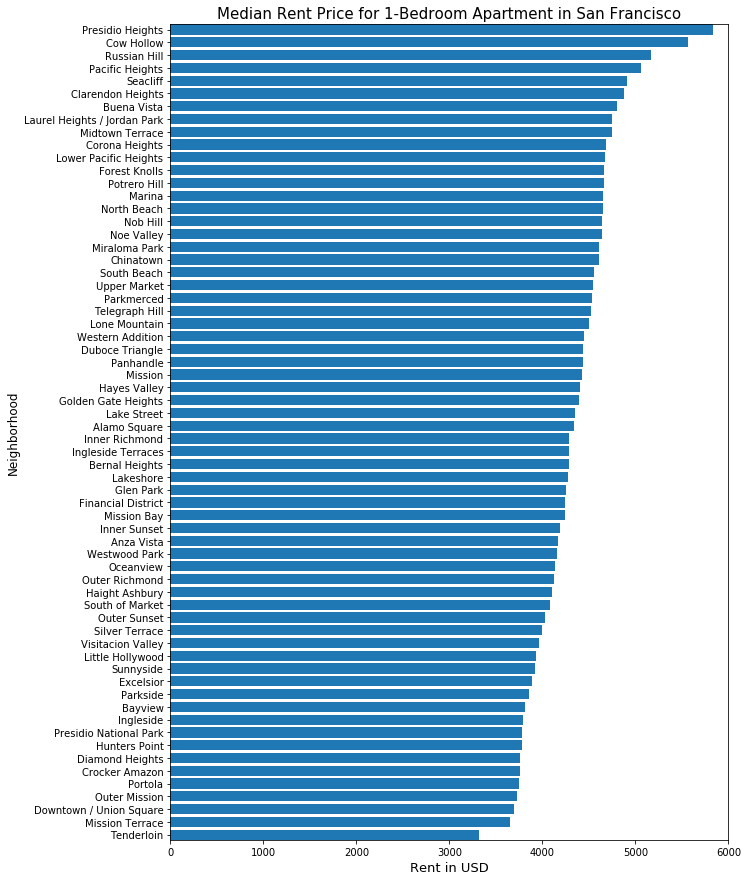

In [5]:
sf_sort = sf_data.copy()
sf_sort.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 15))

plt.barh(sf_sort.name, sf_sort.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in San Francisco", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,6000)
plt.ylabel("Neighborhood", size=12)

plt.show()

## Data Distribution

C:\Users\deand\Anaconda3\envs\default\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\deand\Anaconda3\envs\default\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


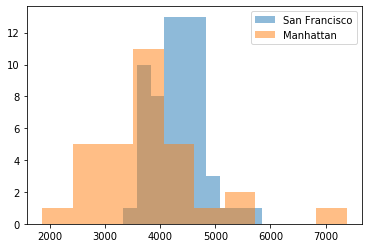

In [35]:
plt.hist(sf_data["Median_Rent"], alpha=0.5, label='San Francisco')
plt.hist(nyc_data["Median_Rent"], alpha=0.5, label='Manhattan')
plt.legend(loc='upper right')
plt.show()

The data distribution is for Manhattan right skewed and normal-ish for San Francisco. Since I know I'll be performing K-Means Clustering, I'll need to normalize my data so that my large-scale data points will not dominate the clustering process. This will also allow me to compare neighborhoods from San Francisco to Manhattan and vice versa. I'll normalize each neighborhood by city and then normalize across both cities using z-scores.

## City Maps: Rent by Neighborhood

In [6]:
state_geo = f'nyc-merged.geojson'
state_data = nyc_data

n = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=12
)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=nyc_data,
    columns=['Name', 'Median_Rent'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
    bins=4,
    highlight=True,
    legend_name='Median Rent'
    
).add_to(n)

folium.LayerControl().add_to(n)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['Name','Median_Rent'], aliases=['Neighborhood', 'Median Rent'])
)

n

In [34]:
state_geo = f'sf-data-merged.geojson'
state_data = sf_data

m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=sf_data,
    columns=['name', 'Median_Rent'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
    bins=4,
    highlight=True,
    legend_name='Median Rent'
    
).add_to(m)

folium.LayerControl().add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name','Median_Rent'], aliases=['Neighborhood', 'Median Rent'])
)


m

In [8]:
sf_rent_new = pd.read_csv('sf-rent.csv')
sf_rent_new.head()

,Combined,Zillow Median
0,Alamo Square,4341.0
1,Anza Vista,4165.0
2,Apparel City,3996.0
3,Aquatic Park / Ft. Mason,4654.0
4,Ashbury Heights,4683.0
